In [59]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import boto3
%matplotlib inline

In [60]:
banks = [
    'JPM', 
    'BAC', 
    'C', 
    'WFC', 
    'GS'
]

In [61]:
def fetch_stock_data(ticker):
    """Fetch weekly stock data using yfinance (no API key needed)"""
    stock = yf.Ticker(ticker)
    df = stock.history(period="5y", interval="1d")
    
    if df.empty:
        print(f"No data returned for {ticker}")
        return None
    
    return df['Close']

In [62]:
series_dict = {}

for bank in banks:
    series = fetch_stock_data(bank)
    if series is not None:
        series_dict[bank] = series

In [63]:
bank_data = pd.DataFrame(series_dict)
bank_data.shape

(1256, 5)

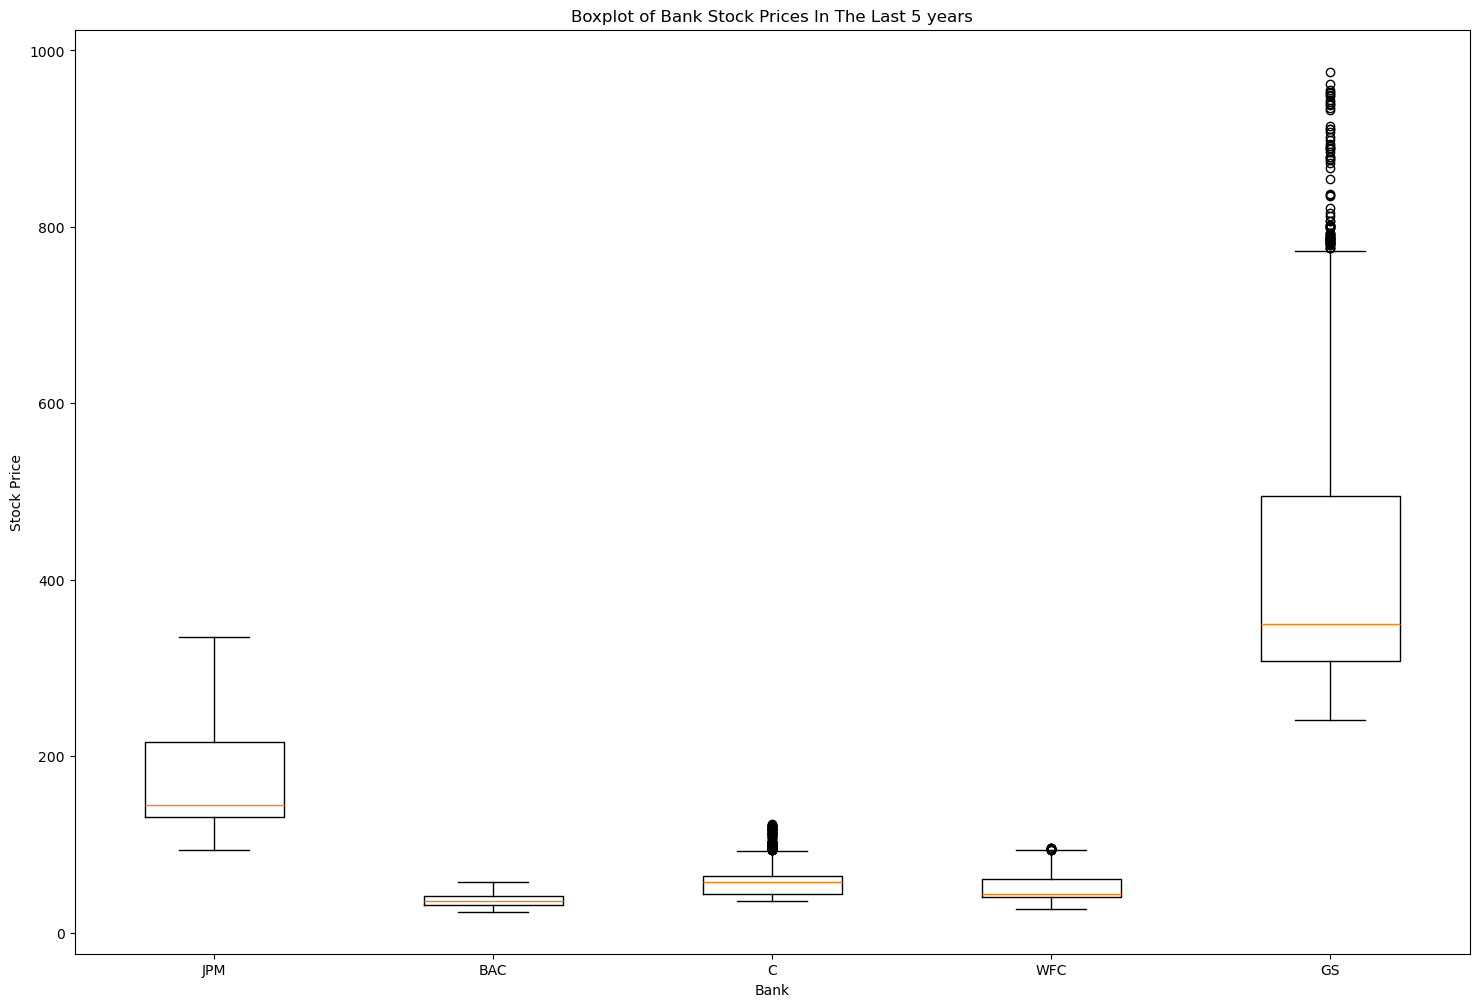

In [64]:
plt.figure(figsize = (18,12))
plt.boxplot(bank_data);
plt.title('Boxplot of Bank Stock Prices In The Last 5 years');
plt.xlabel('Bank');
plt.ylabel('Stock Price');

banks = range(1, len(bank_data.columns)+1)
labels = list(bank_data.columns)
plt.xticks(banks, labels);

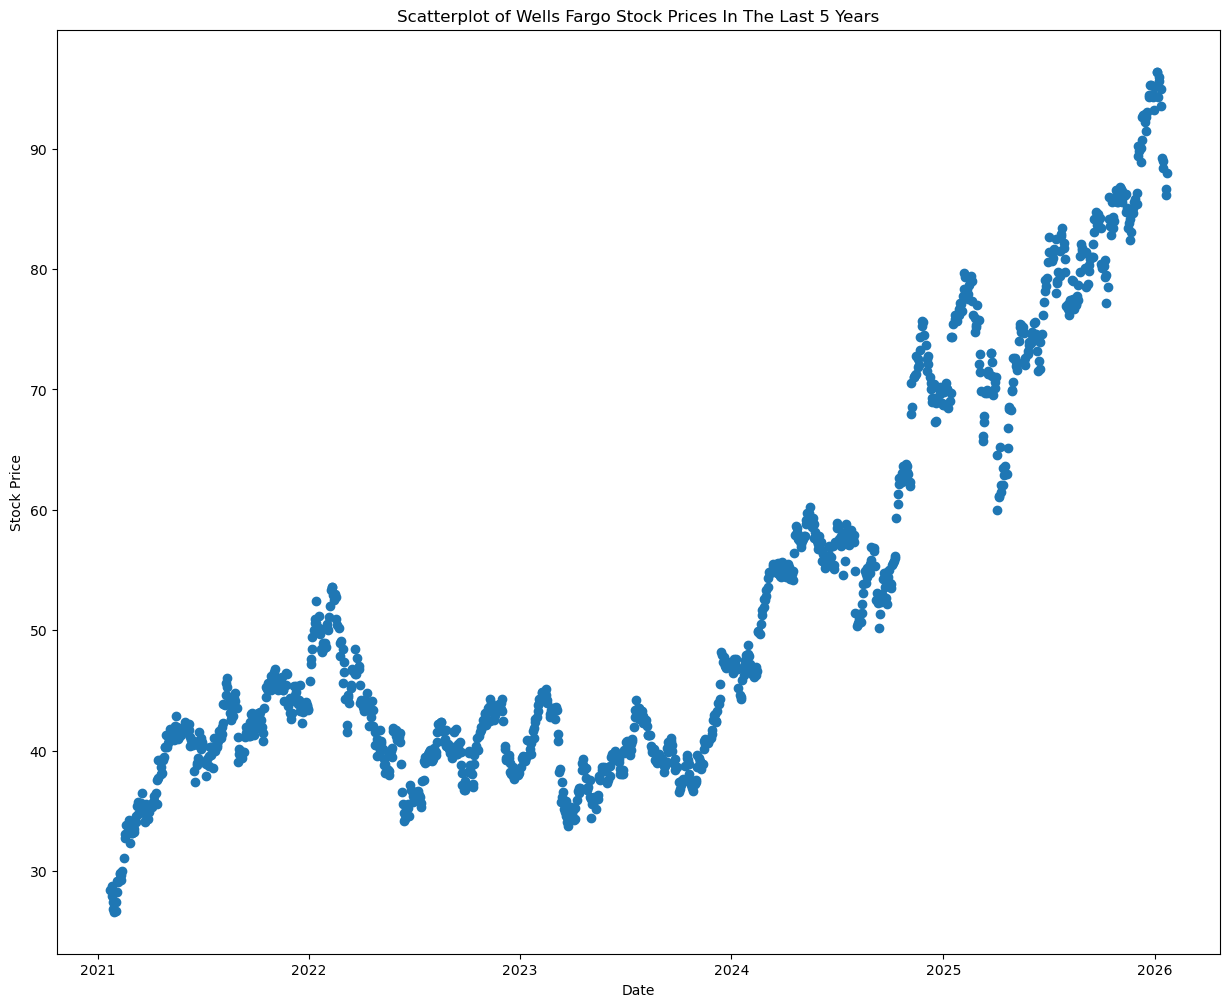

In [65]:
dates = bank_data.index.to_series()

WFC_stock_prices = bank_data['WFC']
plt.figure( figsize=(15,12))
plt.scatter(dates, WFC_stock_prices);
plt.title('Scatterplot of Wells Fargo Stock Prices In The Last 5 Years');
plt.xlabel('Date');
plt.ylabel('Stock Price');

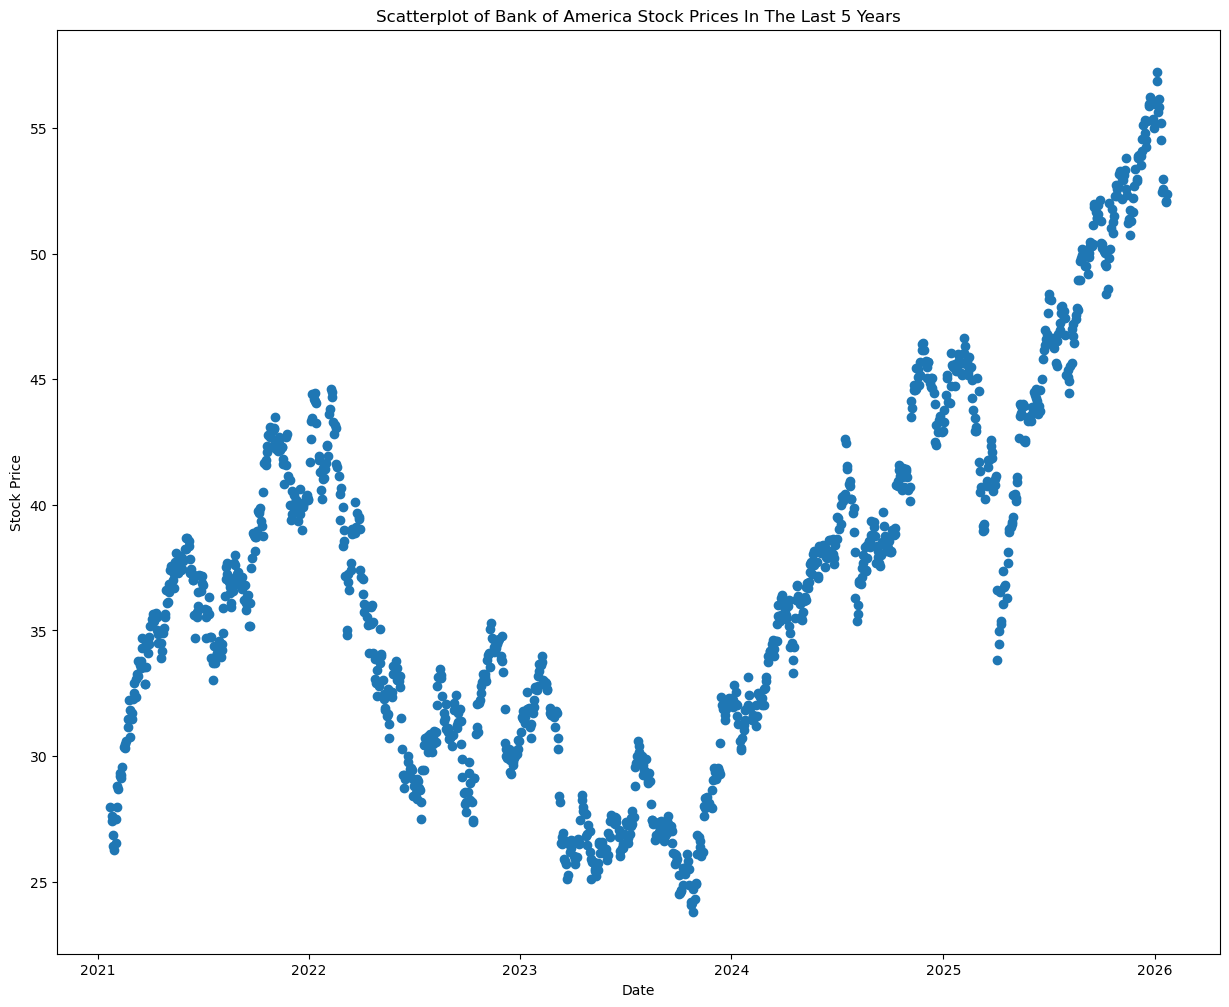

In [66]:
dates = bank_data.index.to_series()

WFC_stock_prices = bank_data['BAC']
plt.figure(figsize=(15,12))
plt.scatter(dates, WFC_stock_prices);
plt.title('Scatterplot of Bank of America Stock Prices In The Last 5 Years');
plt.xlabel('Date');
plt.ylabel('Stock Price');

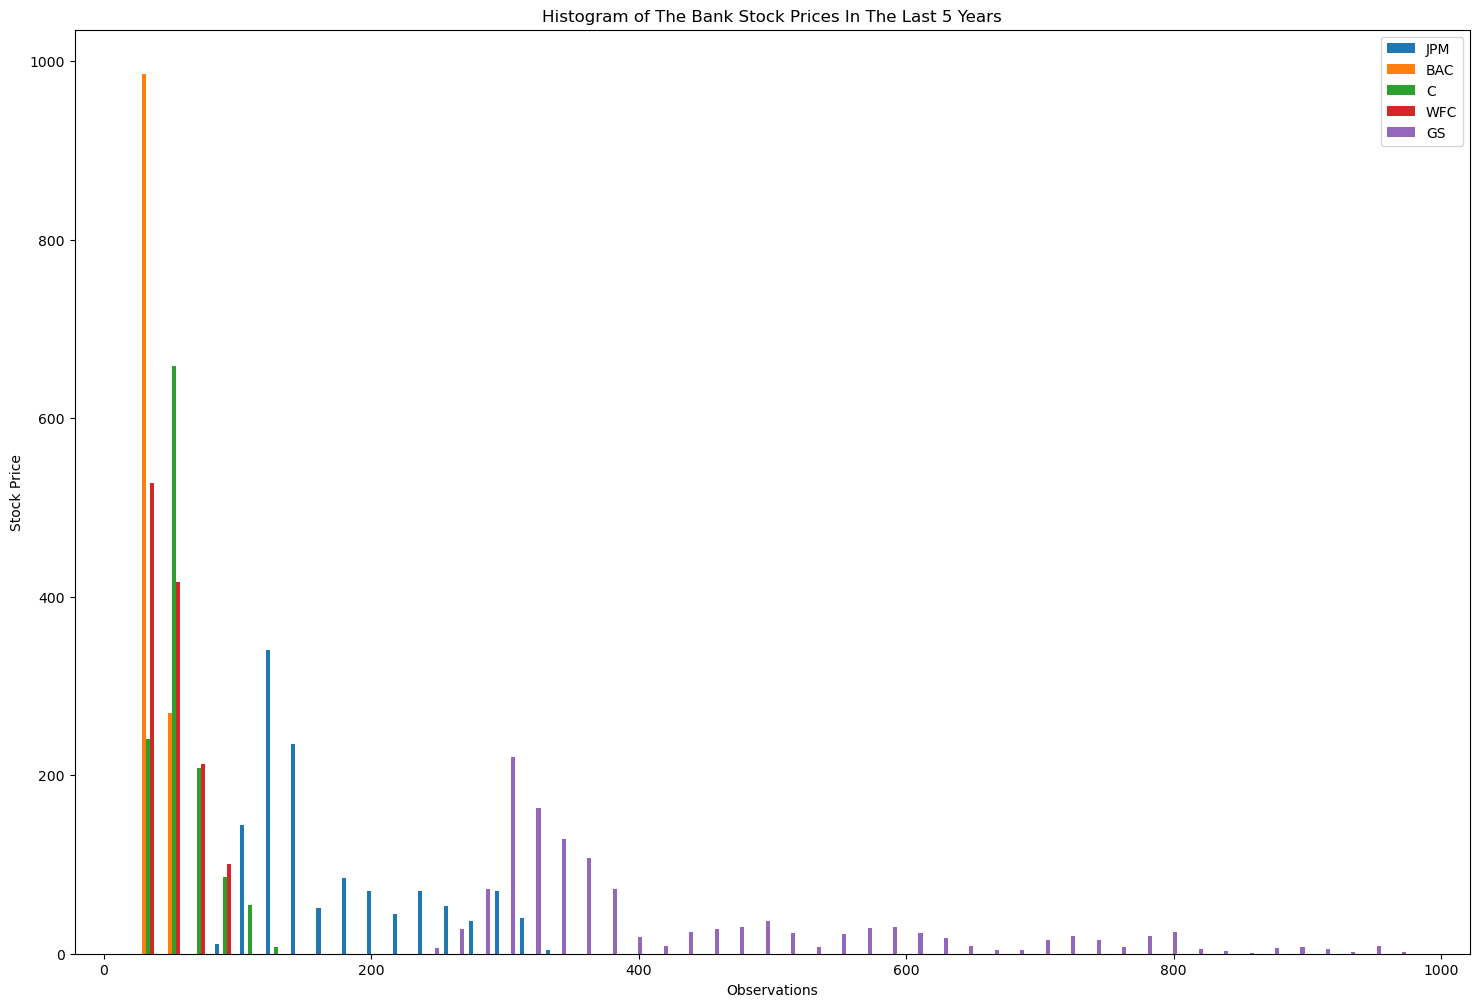

In [67]:
plt.figure(figsize=(18,12))
plt.hist(bank_data, bins=50);
plt.legend(bank_data.columns);
plt.title('Histogram of The Bank Stock Prices In The Last 5 Years');
plt.xlabel('Observations');
plt.ylabel('Stock Price');

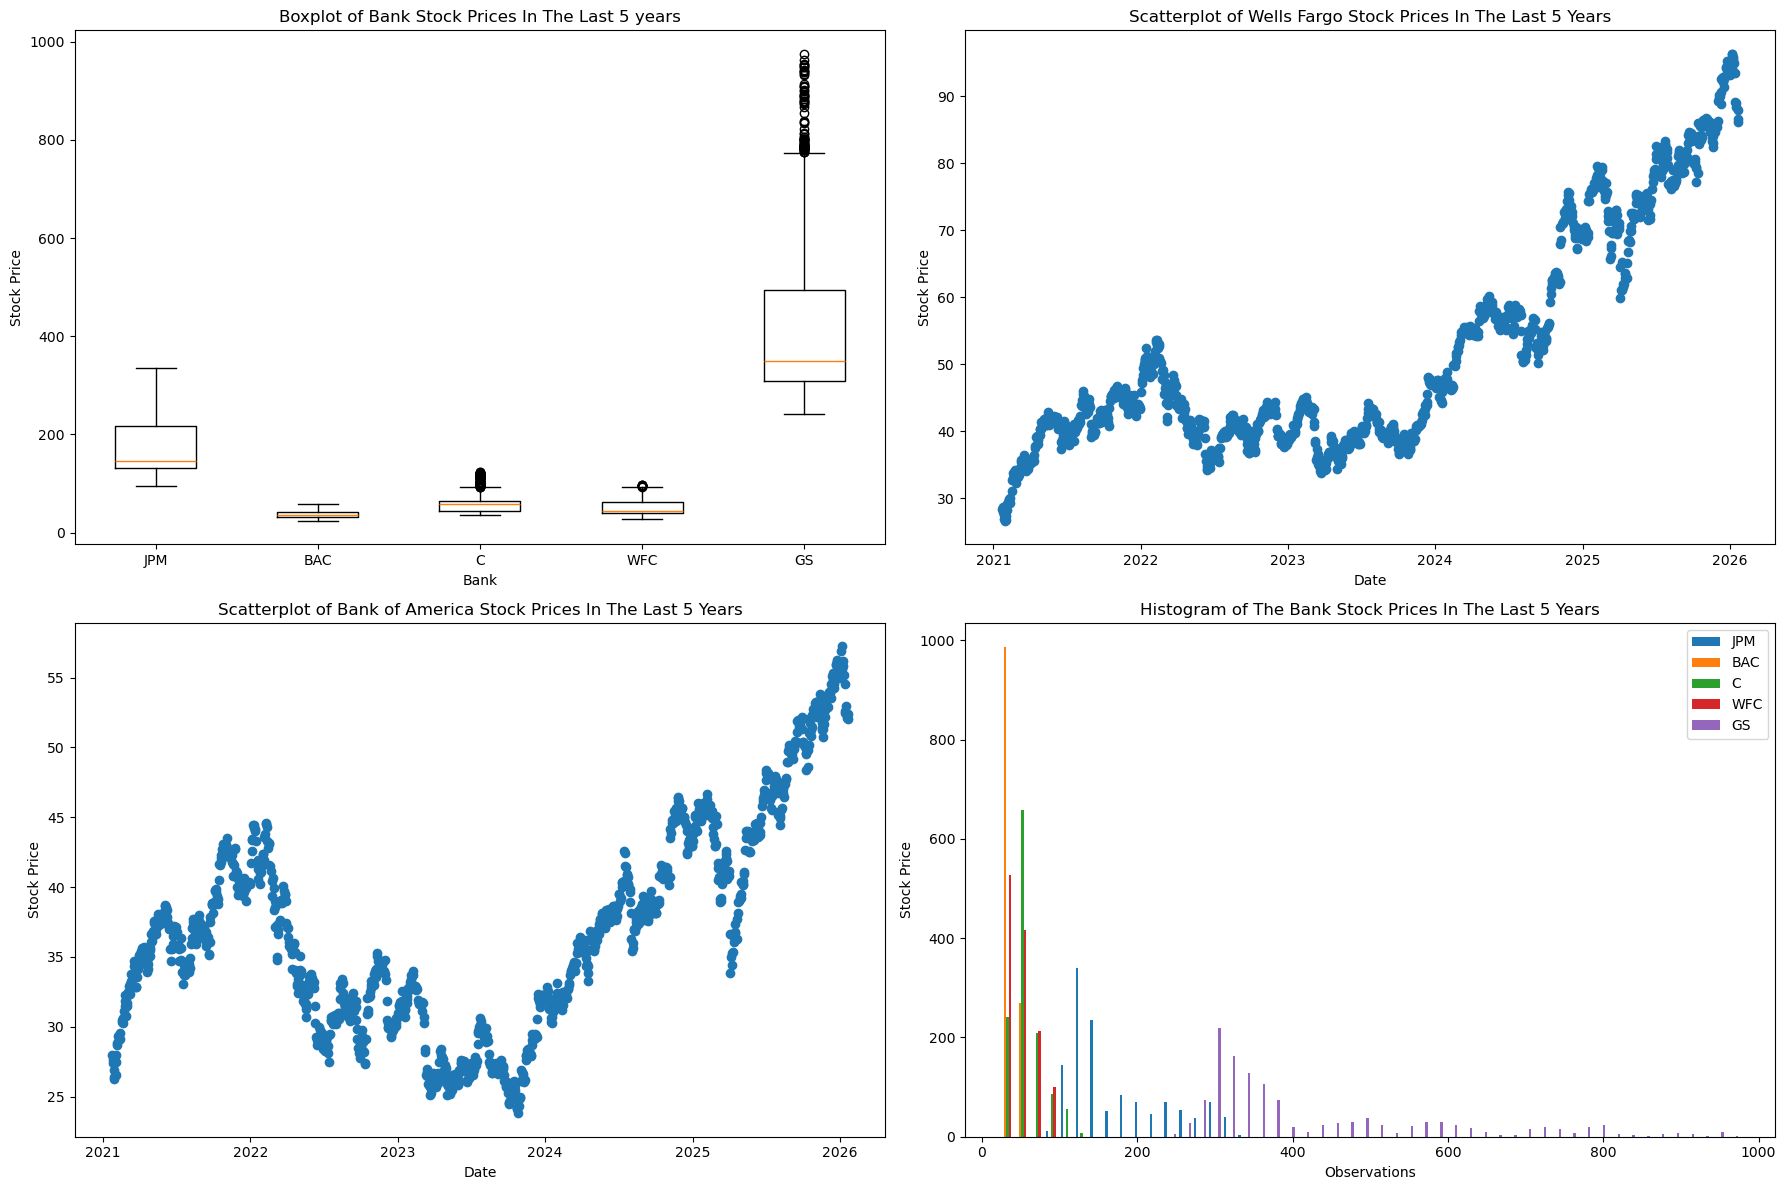

In [68]:
plt.figure(figsize=(18,12));

# Subplot 1: Boxplot
plt.subplot(2,2,1);
plt.boxplot(bank_data);
plt.title('Boxplot of Bank Stock Prices In The Last 5 years');
plt.xlabel('Bank');
plt.ylabel('Stock Price');

banks = range(1, len(bank_data.columns)+1)
labels = list(bank_data.columns)
plt.xticks(banks, labels);

# Subplot 2: Scatterplot of Wells Fargo Bank
plt.subplot(2,2,2);
dates = bank_data.index.to_series()

WFC_stock_prices = bank_data['WFC']
plt.scatter(dates, WFC_stock_prices);
plt.title('Scatterplot of Wells Fargo Stock Prices In The Last 5 Years');
plt.xlabel('Date');
plt.ylabel('Stock Price');

# Subplot 3: Scatterplot of Bank of America
plt.subplot(2,2,3);
dates = bank_data.index.to_series()

WFC_stock_prices = bank_data['BAC']
plt.scatter(dates, WFC_stock_prices);
plt.title('Scatterplot of Bank of America Stock Prices In The Last 5 Years');
plt.xlabel('Date');
plt.ylabel('Stock Price');

# Subplot 4: Histogram
plt.subplot(2,2,4);
plt.hist(bank_data, bins=50);
plt.legend(bank_data.columns);
plt.title('Histogram of The Bank Stock Prices In The Last 5 Years');
plt.xlabel('Observations');
plt.ylabel('Stock Price');

plt.tight_layout();
# plt.savefig('bank_data.png')

In [69]:
s3 = boto3.resource('s3')
s3.meta.client.upload_file('bank_data.png', 'tanner-first-bucket', 'bank_data.png', ExtraArgs={'ACL': 'public-read'})